In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import os
(train_x,train_y),(test_x,test_y)=mnist.load_data()
train_x=train_x/255.0 
test_x=test_x/255.0
# train_y=tf.one_hot(train_y,depth=10)
# test_y=tf.one_hot(test_y,depth=10)
print(train_x.shape)
print(train_y[1])
print(test_x.shape)
print(test_y[1])

(60000, 28, 28)
0
(10000, 28, 28)
2


4


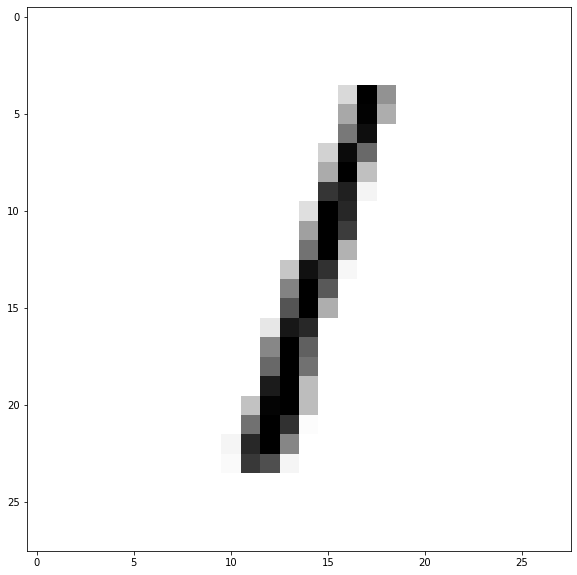

In [4]:
figure=plt.figure(figsize=(10,10))
plt.imshow(test_x[2],cmap=plt.cm.binary)
# plt.title(train_y[1])
print(train_y[2])
plt.show()

In [9]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128,activation="relu",kernel_regularizer=tf.keras.regularizers.l2()),
)
model.add(tf.keras.layers.Dense(units=10,activation="softmax"))

checkpoint_save_path="./mycheck/checkpoint_save"
if os.path.exists(checkpoint_save_path+".index"):
    print("-----------------load the model---------------")
    model.load_weights(checkpoint_save_path)
minist_callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,save_best_only=True,save_weights_only=True)
model.compile(optimizer="adam",loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=["accuracy"])
train_history=model.fit(train_x,train_y,verbose=2,epochs=100,validation_split=0.2,validation_freq=20,batch_size=50,callbacks=[minist_callback])

-----------------load the model---------------
Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 - 8s - loss: 0.2008 - accuracy: 0.9663
Epoch 2/100
48000/48000 - 6s - loss: 0.1999 - accuracy: 0.9669
Epoch 3/100
48000/48000 - 6s - loss: 0.2021 - accuracy: 0.9652
Epoch 4/100
48000/48000 - 7s - loss: 0.2024 - accuracy: 0.9658
Epoch 5/100
48000/48000 - 6s - loss: 0.2018 - accuracy: 0.9652
Epoch 6/100
48000/48000 - 6s - loss: 0.1986 - accuracy: 0.9672
Epoch 7/100
48000/48000 - 6s - loss: 0.2050 - accuracy: 0.9654
Epoch 8/100
48000/48000 - 6s - loss: 0.2011 - accuracy: 0.9653
Epoch 9/100
48000/48000 - 6s - loss: 0.2042 - accuracy: 0.9644
Epoch 10/100
48000/48000 - 6s - loss: 0.1984 - accuracy: 0.9669
Epoch 11/100
48000/48000 - 6s - loss: 0.2057 - accuracy: 0.9642
Epoch 12/100
48000/48000 - 6s - loss: 0.2009 - accuracy: 0.9655
Epoch 13/100
48000/48000 - 6s - loss: 0.2005 - accuracy: 0.9654
Epoch 14/100
48000/48000 - 6s - loss: 0.1996 - accuracy: 0.9650
Epoch 15/100
480

48000/48000 - 6s - loss: 0.1966 - accuracy: 0.9670
Epoch 59/100
48000/48000 - 6s - loss: 0.2025 - accuracy: 0.9657
Epoch 60/100
48000/48000 - 7s - loss: 0.1993 - accuracy: 0.9659 - val_loss: 0.2038 - val_accuracy: 0.9659
Epoch 61/100
48000/48000 - 6s - loss: 0.2040 - accuracy: 0.9653
Epoch 62/100
48000/48000 - 6s - loss: 0.1989 - accuracy: 0.9663
Epoch 63/100
48000/48000 - 6s - loss: 0.1972 - accuracy: 0.9674
Epoch 64/100
48000/48000 - 6s - loss: 0.2000 - accuracy: 0.9666
Epoch 65/100
48000/48000 - 6s - loss: 0.2023 - accuracy: 0.9653
Epoch 66/100
48000/48000 - 6s - loss: 0.1960 - accuracy: 0.9672
Epoch 67/100
48000/48000 - 6s - loss: 0.2012 - accuracy: 0.9648
Epoch 68/100
48000/48000 - 6s - loss: 0.1990 - accuracy: 0.9664
Epoch 69/100
48000/48000 - 6s - loss: 0.1996 - accuracy: 0.9664
Epoch 70/100
48000/48000 - 6s - loss: 0.2015 - accuracy: 0.9657
Epoch 71/100
48000/48000 - 6s - loss: 0.1999 - accuracy: 0.9659
Epoch 72/100
48000/48000 - 6s - loss: 0.1983 - accuracy: 0.9662
Epoch 73/10

In [ ]:
import numpy as np
predictions=model.predict(test_x)
number=np.random.randint(1000)
figure=plt.figure(figsize=(20,20))
for i in range(number,number+25):
    plt.subplot(5,5,i+1-number)
    plt.xticks([])
    plt.yticks([])
    plt.title("real:%d,pred:%d"%(test_y[i],np.argmax(predictions[i])))
    plt.imshow(test_x[i],cmap=plt.cm.binary)
plt.show()